# ABOUT PROJECT
This project focuses on retrieving data from various Application Programming Interfaces (APIs). By engaging in this endeavor, I aim to enhance my proficiency in accessing and utilizing external data sources through API integration.


In [3]:
# import libraries
import requests 
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# API url
url="https://api.frankfurter.app/2013-01-01..2023-12-31"

In [5]:
# get data from the API
response=requests.get(url)

In [6]:
# Transform API DATA to json
data=response.json()

In [7]:
# convert json to a data frame
df=pd.DataFrame(data)

In [8]:
df.head(2)

,amount,base,start_date,end_date,rates
2012-12-31,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2534, 'BGN': 1.9558, 'BRL': 2.6831, ..."
2013-01-07,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2454, 'BGN': 1.9558, 'BRL': 2.6658, ..."


In [9]:
# Normalize the rates column
df_rates=json_normalize(df['rates'])

In [10]:
df_rates.head(2)

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,1.2534,1.9558,2.6831,1.296,1.2091,8.1813,25.278,7.4597,0.81235,10.1738,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,1.2454,1.9558,2.6658,1.293,1.2106,8.1627,25.579,7.4605,0.81633,10.1650,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN


In [11]:
# Reset index
df=df.reset_index()

In [12]:
# drop rates from df
df=df.drop('rates',axis=1)

In [13]:
df=pd.concat([df,df_rates],axis=1)

In [14]:
df.head(2)

,index,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,2012-12-31,1.0,EUR,2012-12-31,2023-12-25,1.2534,1.9558,2.6831,1.296,1.2091,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,2013-01-07,1.0,EUR,2012-12-31,2023-12-25,1.2454,1.9558,2.6658,1.293,1.2106,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN


In [15]:
# Drop first row which doesnt meant our criteria of the preffered start date
df = df.drop(df.index[0])

In [16]:
# transform the index column to dates
df['index']=pd.to_datetime(df['index'])

In [17]:
eur_usd=df[['index','amount','USD']]

In [18]:
# How the exchange rate of the euro against the USD has changed over time
eur_against_usd=eur_usd.set_index('index').sort_index(ascending=True)['USD'].resample('YE').mean().loc['2013':'2023']

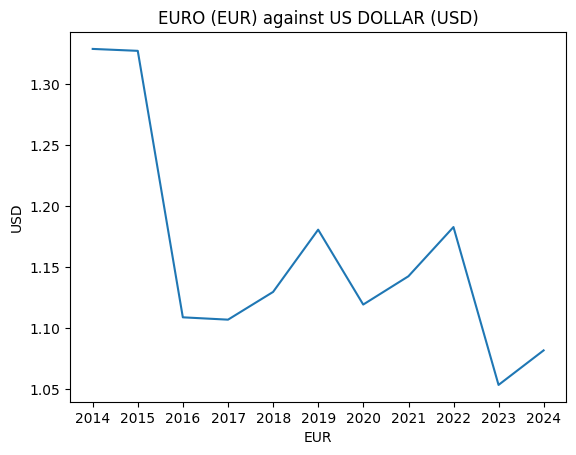

In [19]:
# plot a line visualization
sns.lineplot(data=eur_against_usd)
plt.ylabel('USD')
plt.xlabel('EUR')
plt.title('EURO (EUR) against US DOLLAR (USD)')
plt.show()

**Observations**  
The US dollar has gained weight over the euro over the years

In [20]:
# The distribution of the exchange rate of chinese YUAN (CNY) against the Euro
yuan_euro=df[['CNY','amount']]

C:\Users\iamde\AppData\Local\Temp\ipykernel_15520\1045826475.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=yuan_euro,legend=False)


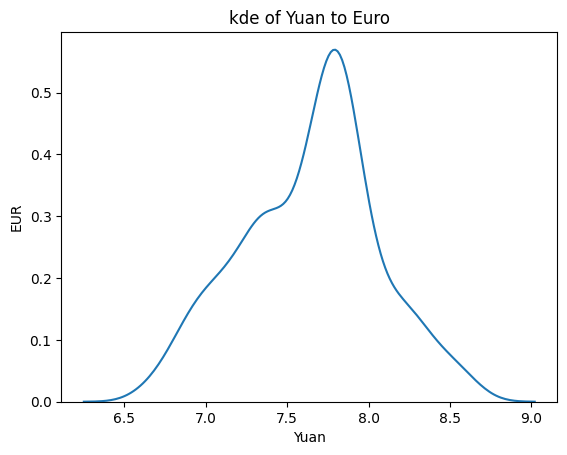

In [21]:
# Histogram plot
sns.kdeplot(data=yuan_euro,legend=False)
plt.title('kde of Yuan to Euro')
plt.xlabel('Yuan')
plt.ylabel('EUR')
plt.show()

**Observations**  
There is a normal distribution

In [22]:
# Between GBP and JPY which is more volatile
gbp_jpy=df[['GBP','JPY']]

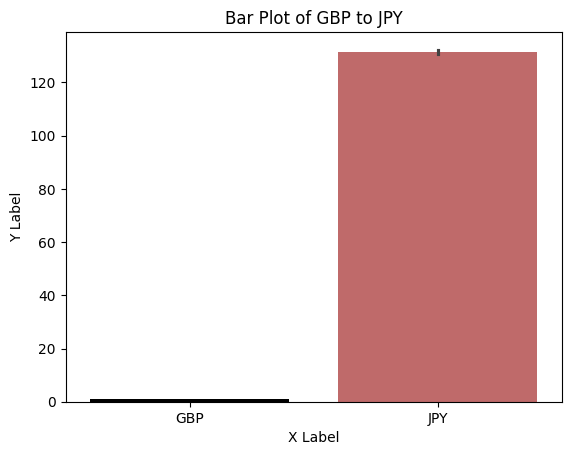

In [23]:
sns.barplot(data=gbp_jpy, palette=['black', 'indianred'])
plt.title('Bar Plot of GBP to JPY')
plt.xlabel('X Label')  
plt.ylabel('Y Label')  
plt.show()

**Observation**  
JPY is way more volatile than the GBP

In [24]:
# Check if there is corrrelation between the exvhange rate of CAD and USD
cad_usd=df[['index','CAD','USD']]

In [25]:
cad_usd=cad_usd.set_index(cad_usd['index'])

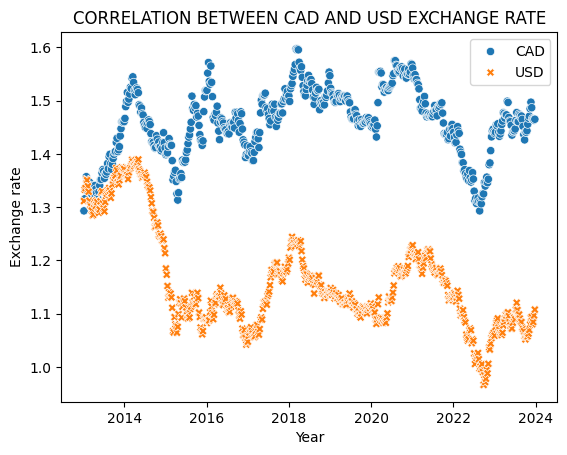

In [26]:
sns.scatterplot(data=cad_usd)
plt.xlabel('Year')
plt.ylabel('Exchange rate')
plt.title('CORRELATION BETWEEN CAD AND USD EXCHANGE RATE')
plt.show()

**Observation**  
There is a correlation between CAD AND USD exchange rate